# Task 3: Regression Model

 Linear regression predicts a dependent variable (y) on a series of changing independent variables (x).
 
 It is assumed that there is approximately some relation between x and y which can be mathematically represented as 
 Y = a + mX + e
 
 where 'a' and 'm' are two unknown constants that represent intercept and slope and 'e' represents the errors.  
 

In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import KFold
%matplotlib inline

# ignore warnings from pandas
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Making different dataframes from csv
df = pd.read_csv(os.getcwd()+ "\Data\FT_data_final.csv", low_memory=False)

# #Visualizing predictions
# plt.scatter(y_test,predictions)

# Correlation
To find out the correlation between variables we plot a heatmap. 

Correlation is an index that ranges from -1 to 1. 

When the value is zero there is no linear relationship between the variables

When the value gets closer to +1 or -1 the relationship is stronger. 

When the value is 1 it indicates a linear relationship


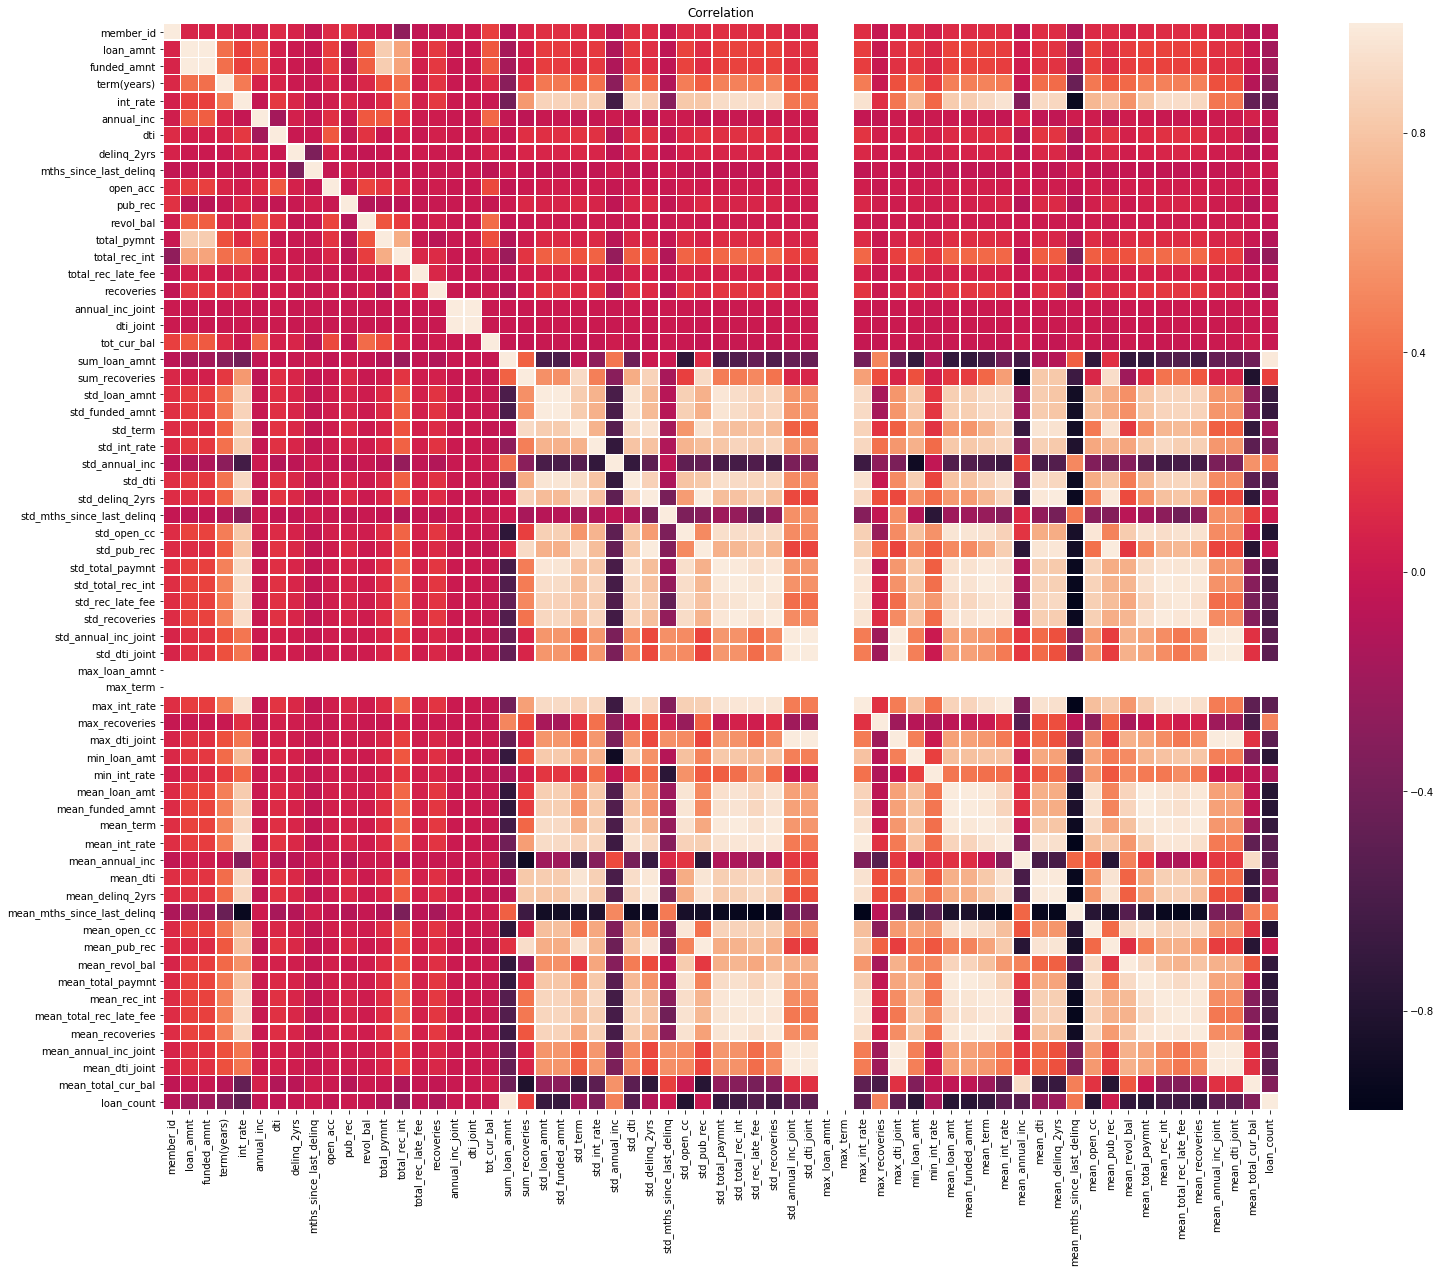

In [5]:
correlation = df.corr()

plt.figure(figsize = (25,20))

plt.title('Correlation')

sb.heatmap(correlation, linewidths=.5) #cmap="YlGnBu"

# Preparing training and test data

In our case we need to predict the interest rate so interest rate is the dependent variable and rest are independent variables
splitting the data into training and testing data

In [6]:
# df.corr()
X = df[['mean_loan_amt','mean_funded_amnt','mean_term','mean_annual_inc',
        'mean_dti','mean_delinq_2yrs','mean_mths_since_last_delinq','mean_open_cc','mean_pub_rec',
        'mean_revol_bal','mean_total_paymnt','mean_rec_int','mean_total_rec_late_fee','mean_recoveries',
        'mean_dti_joint','mean_annual_inc_joint','mean_total_cur_bal']]
Y = df['int_rate']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

# Training the model to predict interest rate
Here we fit the linear regression model on the training dataset.
It tries to find the best value of intercept and slope which results in the line that best fits the data.

In [7]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

#Get the coefficients for all the attributes
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  

print("Coeff_df")
print(coeff_df)


#Prediction
Y_predicted = lm.predict(X_test)
print("Predicted Values")
print(Y_predicted)

Coeff_df
                              Coefficient
mean_loan_amt               -5.433079e+06
mean_funded_amnt            -3.775693e+07
mean_term                    1.188978e+06
mean_annual_inc              2.026545e+07
mean_dti                     2.319317e+07
mean_delinq_2yrs             1.799208e+06
mean_mths_since_last_delinq -4.245217e+07
mean_open_cc                 1.573857e+07
mean_pub_rec                 3.068628e+06
mean_revol_bal              -1.675913e+08
mean_total_paymnt            1.356479e+08
mean_rec_int                 3.890029e+08
mean_total_rec_late_fee      6.574502e+06
mean_recoveries             -2.421087e+09
mean_dti_joint               1.973047e+04
mean_annual_inc_joint        3.675253e+07
mean_total_cur_bal          -2.772065e+06
Predicted Values
[ 7.50350952 14.63140869 14.63140869 ... 14.63140869 11.54412842
 20.34603882]


# Actual interest rate vs Predicted interest rate

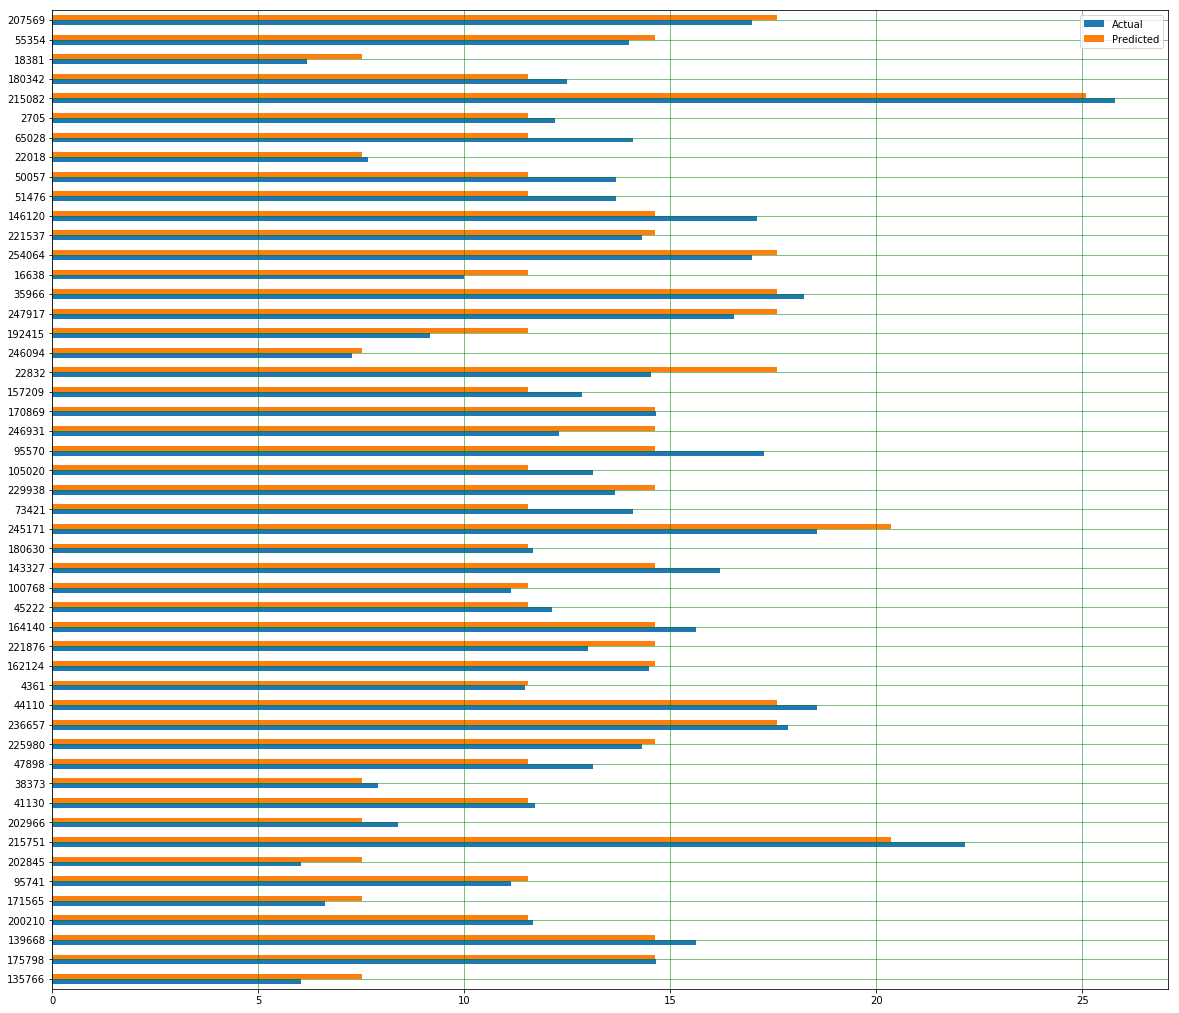

In [27]:
#Take the two values for comparison as actual and predicted
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_predicted})

# pred_df.head(50)

#print the values
prd = pred_df.head(50)

#plot the values for comparison

prd.plot(kind='barh',figsize=(20,18))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


# Evaluating the performance of the model

In [11]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(Y_test, Y_predicted)) 
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))
a = round (100 - mean_absolute_percentage_error(Y_test, Y_predicted),2)
print('Accuracy:', a , '%')

Mean Absolute Percentage Error: 8.436321371390914
Mean Absolute Error: 1.0584563601591022
Mean Squared Error: 1.7448262574847668
Root Mean Squared Error: 1.3209187172134276
Accuracy: 91.56 %


# 5-Fold Cross Validation

We split our data into 5 different subsets/folds.

We use one subset to train our data and leave the last subset as test data

In [12]:
#Defining the split into 5 Fold

kf = KFold(n_splits = 5)

for trn_indx, tst_indx in kf.split(X):
    kf_X_train, kf_X_test = X.iloc[trn_indx], X.iloc[tst_indx]
    kf_Y_train, kf_Y_test = Y.iloc[trn_indx], Y.iloc[tst_indx]

# Training the model to predict interest rate after Cross Validation

In [13]:
kf_lm = LinearRegression()
kf_lm.fit(kf_X_train,kf_Y_train)

#Get the coefficients for all the attributes
kf_coeff_df = pd.DataFrame(kf_lm.coef_, X.columns, columns=['Coefficient'])  

print("Coeff_df")
print(kf_coeff_df)


#Prediction
kf_Y_predicted = kf_lm.predict(kf_X_test)
print("Predicted Values")
print(kf_Y_predicted)

Coeff_df
                              Coefficient
mean_loan_amt                3.179658e+06
mean_funded_amnt            -3.091142e+06
mean_term                   -4.369873e+02
mean_annual_inc             -5.776947e+03
mean_dti                     2.082643e+03
mean_delinq_2yrs             5.548106e+02
mean_mths_since_last_delinq -8.291361e+03
mean_open_cc                 1.609828e+03
mean_pub_rec                 2.853074e+02
mean_revol_bal               1.758418e+05
mean_total_paymnt           -4.364889e+05
mean_rec_int                 3.427466e+05
mean_total_rec_late_fee      2.306213e+03
mean_recoveries              1.063296e+04
mean_dti_joint              -3.802615e+00
mean_annual_inc_joint       -7.783487e+03
mean_total_cur_bal           8.617855e+03
Predicted Values
[11.72538829 11.72538829 11.72538829 ... 14.91615832 20.57000268
 14.91615832]


# Actual interest rate vs Predicted interest rate after Cross Validation

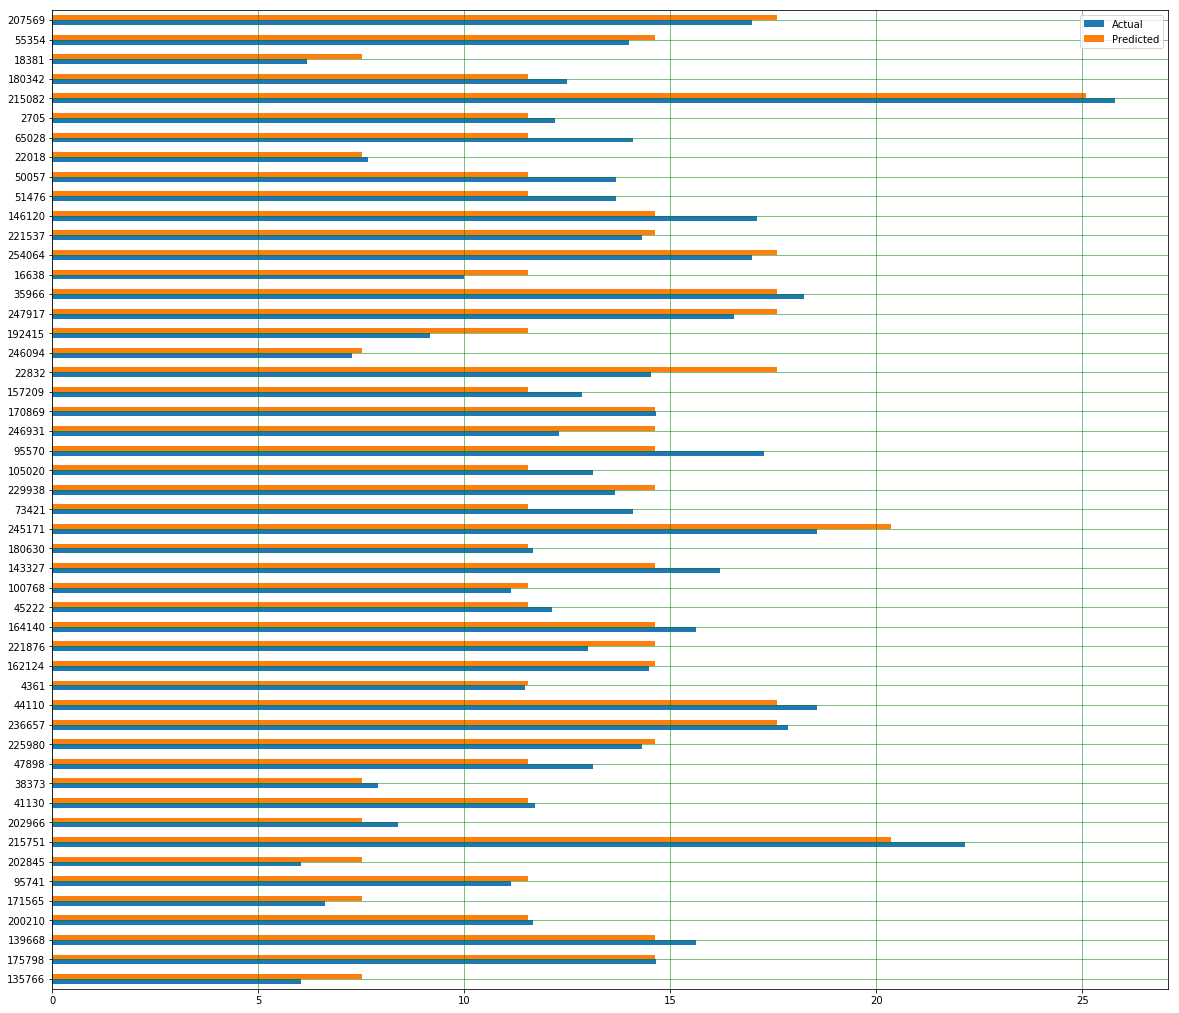

In [14]:
#Take the two values for comparison as actual and predicted
kf_pred_df = pd.DataFrame({'Actual': kf_Y_test, 'Predicted': kf_Y_predicted})

#print the values
kf_prd = kf_pred_df.head(50)

#plot the values for comparison
prd.plot(kind='barh',figsize=(20,18))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Evaluating the performance of the model

In [15]:
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(kf_Y_test, kf_Y_predicted)) 
print('Mean Absolute Error:',metrics.mean_absolute_error(kf_Y_test,kf_Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(kf_Y_test, kf_Y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(kf_Y_test, kf_Y_predicted)))
kf_a = round (100 - mean_absolute_percentage_error(Y_test, Y_predicted),2)
print('Accuracy:', kf_a , '%')

Mean Absolute Percentage Error: 9.87527400681246
Mean Absolute Error: 1.1936067940166535
Mean Squared Error: 2.1503321456486764
Root Mean Squared Error: 1.4664010862136854
Accuracy: 91.56 %
